<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span><ul class="toc-item"><li><span><a href="#План-работ" data-toc-modified-id="План-работ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>План работ</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>XGBRegressor</a></span></li><li><span><a href="#LinerRegression" data-toc-modified-id="LinerRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LinerRegression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LightGBMRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

## Постановка задачи

По исходным данным о количестве заказов такси в аэропортах необходимо спрогнозировать количество заказов такси на следующий час, построить модель для такого предсказания. 

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.


### План работ 


1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

### Описание данных

- Данные лежат в файле /datasets/taxi.csv. 
- Количество заказов находится в столбце 'num_orders`.


## Подготовка данных

In [1]:
!pip install hyperopt

     |████████████████████████████████| 1.6 MB 1.2 MB/s            
     |████████████████████████████████| 2.0 MB 30.8 MB/s            
     |████████████████████████████████| 829 kB 75.1 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=12bcf0be86f39a8b835ade44660d4936824b2420ff9976beefb37bed8277ec49
  Stored in directory: /home/jovyan/.cache/pip/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
Successfully built future


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor

import lightgbm as lgb
from catboost import CatBoostRegressor

from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from functools import partial

In [3]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates = [0], index_col = [0])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
data.tail()

,num_orders
datetime,
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27
2018-08-31 23:40:00,39
2018-08-31 23:50:00,53


In [6]:
data.sort_index(inplace = True)
data.index.is_monotonic

True

Сгруппируем количество заказов по дням и посмотрим график заказов за весь период наблюдения

In [7]:
data = data.resample('1H').sum()

## Исследовательский анализ

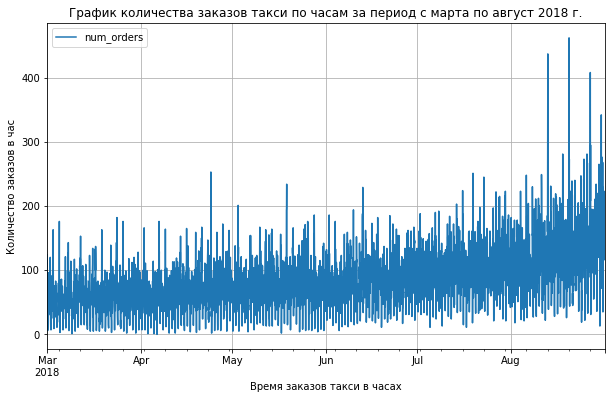

In [8]:
data.plot(grid = True, figsize = (10, 6))

plt.xlabel('Время заказов такси в часах')
plt.ylabel('Количество заказов в час')
plt.title('График количества заказов такси по часам за период с марта по август 2018 г.')
plt.show()

По графику видим, что с марта по август наблюдается явная тенденция по увеличению количества заказов. Проанализируем более детально скользящее среднее.

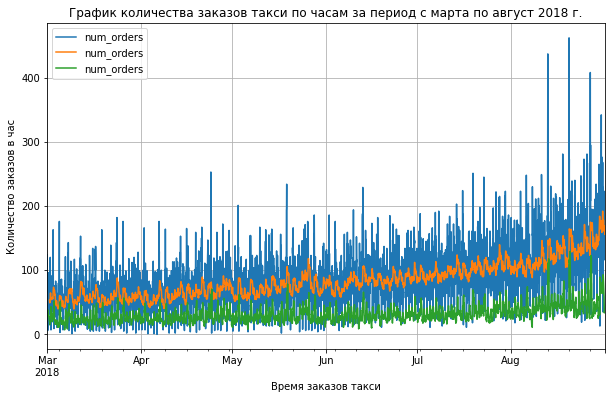

In [9]:
ax = data.plot(grid = True, figsize = (10, 6))
data.rolling(20).mean().plot(grid = True, figsize = (10, 6), ax=ax)
data.rolling(10).std().plot(grid = True, figsize = (10, 6), ax=ax)

plt.xlabel('Время заказов такси')
plt.ylabel('Количество заказов в час')
plt.title('График количества заказов такси по часам за период с марта по август 2018 г.')
plt.show()

Тендеция увеличения заказов прослеживается более явно. Исследуем сезонность и тренд подробнее. График сезонности рассмотрим на более узком промежутке времени, чтобы увидеть закономерность.

In [10]:
decomposed = seasonal_decompose(data) 

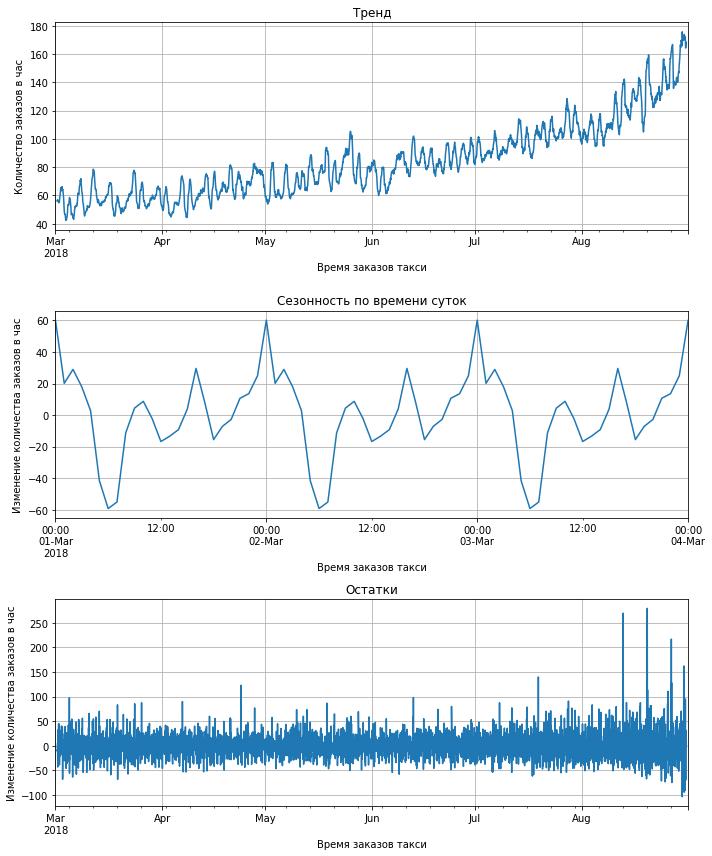

In [11]:
plt.figure(figsize = (10, 12))

plt.subplot(311)
decomposed.trend.plot(ax = plt.gca(), grid = True)
plt.xlabel('Время заказов такси')
plt.ylabel('Количество заказов в час')
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax = plt.gca(), grid = True)
plt.xlim('2018-03-01 00:00:00', '2018-03-04 00:00:00')
plt.xlabel('Время заказов такси')
plt.ylabel('Изменение количества заказов в час')
plt.title('Сезонность по времени суток')

plt.subplot(313)
decomposed.resid.plot(ax = plt.gca(), grid = True)
plt.xlabel('Время заказов такси')
plt.ylabel('Изменение количества заказов в час')
plt.title('Остатки')

plt.tight_layout()

На графике сезонности прослеживается явная закономерность изменения количества заказов от времени суток: количество заказов растет с 8 утра до 12, затем после пары падений и взлетов снова начинает расти до 12 ночи и затем количество заказов уменьшается до 8 утра следующего дня. Вероятно, это связано с расписанием прилета самолетов в аэропорт. Ввиду наличия такой закономерности создадим столбец с признаком, характеризующим время суток.

In [12]:
data['hour'] = data.index.hour
data['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Рассмотрим детально количество заказов в день на протяжении месяца.

In [13]:
decomposed = seasonal_decompose(data['num_orders'].resample('1D').sum()) 

Text(0.5, 1.0, 'Сезонность по дню недели')

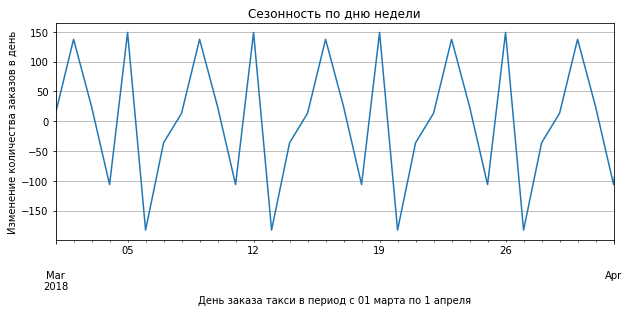

In [14]:
plt.figure(figsize = (10, 4))
decomposed.seasonal.plot(grid = True)

plt.xlim('2018-03-01', '2018-04-01')
plt.xlabel('День заказа такси в период с 01 марта по 1 апреля')
plt.ylabel('Изменение количества заказов в день')
plt.title('Сезонность по дню недели')

По графику отслеживается сезонность заказов такси по дням недели: с понедельника по вторник количество заказов падает, затем до пятницы оно растет, падает до воскресенья и снова возрастает в понедельник. Создадим признак дня недели.

In [15]:
data['dayofweek'] = data.index.dayofweek
data['dayofweek'].unique()

array([3, 4, 5, 6, 0, 1, 2])

Посмотрим, есть ли какая-то закономерность в заказах такси по неделям.

<Figure size 432x288 with 0 Axes>

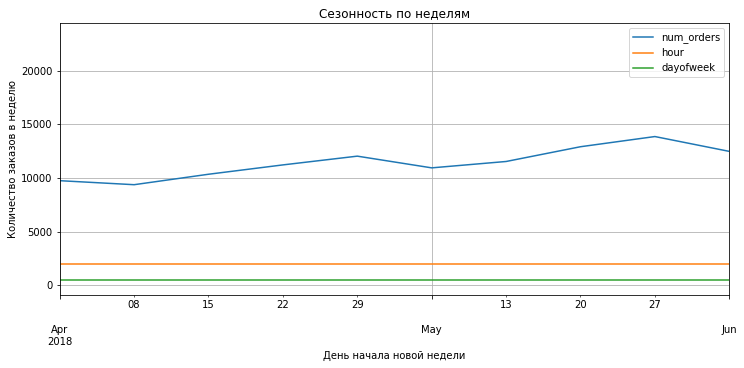

In [16]:
plt.figure()
data.resample('1W').sum().plot(grid = True, figsize = (12, 5))
plt.xlim('2018-04-01', '2018-06-01')


plt.xlabel('День начала новой недели')
plt.ylabel('Количество заказов в неделю')
plt.title('Сезонность по неделям')
plt.show()

Сезонность не такая явная как с днями недели, но закономерость все равно уловить можно: три недели количество заказов такси растет, на чевертую неделю немного снижается и затем снова растет. Создадам признак по номеру недели.

In [17]:
data['week'] = data.index.isocalendar()['week'] % 4
data['week'].unique()

<IntegerArray>
[1, 2, 3, 0]
Length: 4, dtype: UInt32

Добавим в качестве признаков также номер месяца и число месяца.

In [18]:
data['month'] = data.index.month
data['day'] = data.index.day

Удостоверимся что наш временной ряд является стационарным с помощью теста Дики-Фуллера. Нулевая гипотеза теста предполагает, что временной ряд не является стационарным. Если значение p-value оказывается меньше стандартных 0.05, то нулевая гипотеза отвергается, ряд стацинарный (или не имеет временной структуры).

In [19]:
result = adfuller(data['num_orders'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.068924
p-value: 0.028940
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Видим, что p-value=0.029 меньше установленного порогоа в 0.05, поэтому нулевую гипотезу отвергаем, ряд стацинарный.

### Вывод

По результатам этапа был проведен анализ исходных данных о наличии трендов и сезонности в рамках различных периодов. По выявленным закономерностям, была сформирована предварительная таблица признаков и проведена проверка временного ряда на стационарность.

## Обучение

Создадим функцию, куда включим расчет скользящего среднего и добавим также в качестве признаков отстающие значения. Разделим данные на обучающую и тестовую выборки и построим несколько моделей по этим данным. Включим все эти процессы в одну функцию.

In [20]:
def sampling(max_lag, rolling_size):
    feats = data.copy()
    for i in range(1, max_lag + 1):
        feats['lag_{}'.format(i)] = data['num_orders'].shift(i)
    
    feats['rolling_mean'] = data['num_orders'].shift(1).rolling(rolling_size).mean()
    feats = feats.dropna()
  
    f_train, f_test, t_train, t_test = train_test_split(feats.drop('num_orders', axis = 1), 
                                                        data.loc[feats.index]['num_orders'], 
                                                        test_size = 0.1, shuffle = False)
    scaler = StandardScaler()
    scaler.fit(f_train)
    
    f_train = scaler.transform(f_train)
    f_test = scaler.transform(f_test)
    
    return {'features_train' : f_train, 
            'features_test' : f_test, 
            'target_train' : t_train, 
            'target_test' : t_test}

Создадим функцию для подбора параметров с помощью hyperopt, использующего байесовскую оптимизацию. Для кроссвалидации временных рядов используем метод TimeSeriesSplit.

In [21]:
def hyperopt_score(params, x_train, y_train, type_model):
    model = type_model(**params, random_state = 12345)
    current_score = abs(cross_val_score(model, x_train, y_train, 
                                        scoring = 'neg_root_mean_squared_error', 
                                        cv = TimeSeriesSplit(n_splits = 4)).mean())

    return {'loss': current_score, 'params': params, 'status': STATUS_OK}

И напишем функцию для запуска моделей на тестовых данных

In [22]:
work_sample = sampling(1, 8)

In [23]:
def model_test(hyper_param, type_model, 
               f_train = work_sample['features_train'], f_test = work_sample['features_test'],
               t_train = work_sample['target_train'], t_test = work_sample['target_test']):
    
    model = type_model(**hyper_param, random_state = 12345)
    model.fit(f_train, t_train)
    predicted = model.predict(f_test)
    
    return mean_squared_error(t_test, predicted, squared = False)

In [24]:
model_metric = pd.DataFrame(index = ['rmse_train', 'rmse_test'], 
                            columns = ['Tree', 'RF', 'LR', 'XGBR', 'LGBM'])

### DecisionTree

Запустим функцию поиска с заданным пространством параметров space

In [456]:
space = {'max_depth': hp.choice("max_depth", np.arange(5, 60, dtype = int))}

In [457]:
work_sample = sampling(1, 12)

In [458]:
trials = Trials()
best = fmin(fn = partial(hyperopt_score, 
                         x_train = work_sample['features_train'], y_train = work_sample['target_train'], 
                         type_model = DecisionTreeRegressor), 
                                                     space = space, algo = tpe.suggest, 
                                                     max_evals = 20, trials = trials)

100%|██████████| 20/20 [00:00<00:00, 26.10trial/s, best loss: 30.624450942018502]


In [459]:
model_metric.loc['rmse_train', 'Tree'] = trials.results[np.argmin([r['loss'] for r in trials.results])]['loss']

In [460]:
hyper_param = {'max_depth' : trials.results[np.argmin([r['loss'] for r in trials.results])]['params']['max_depth']}

In [461]:
model_metric.loc['rmse_test', 'Tree'] = model_test(hyper_param, DecisionTreeRegressor)

In [462]:
model_metric

,Tree,RF,LR,XGBR,LGBM
rmse_train,30.624451,NaN,NaN,NaN,NaN
rmse_test,49.588463,NaN,NaN,NaN,NaN


In [463]:
hyper_param

{'max_depth': 8}

Наилучшие результаты для модели Дерево решений были получены при скользящем среднем с окном =1 и максимальном сдвиге в дополнительных признаках =12, а также глубине дерева =9. Требуемое качество на тестовой моделе $RMSE$ <48 на этой моделе достигнуто: $RMSE$ =47.96

### XGBRegressor

In [464]:
space ={
    'max_depth': hp.choice("max_depth", np.arange(5, 10, dtype = int)),
    'n_estimators' : hp.choice("n_estimators", np.arange(45, 50, dtype = int))
}

In [465]:
work_sample = sampling(4, 8)

In [466]:
trials = Trials()
best = fmin(fn = partial(hyperopt_score, 
                         x_train = work_sample['features_train'], y_train = work_sample['target_train'], 
                         type_model = XGBRegressor), 
                                                     space = space, algo = tpe.suggest, 
                                                     max_evals = 10, trials = trials)

100%|██████████| 10/10 [02:32<00:00, 15.22s/trial, best loss: 26.673856282653265]


In [467]:
model_metric.loc['rmse_train', 'XGBR'] = trials.results[np.argmin([r['loss'] for r in trials.results])]['loss']

In [468]:
hyper_param = {'max_depth' : trials.results[np.argmin([r['loss'] for r in trials.results])]['params']['max_depth'],
               'n_estimators' : trials.results[np.argmin([r['loss'] for r in trials.results])]['params']['n_estimators']}

In [469]:
model_metric.loc['rmse_test', 'XGBR'] = model_test(hyper_param, XGBRegressor)

In [470]:
model_metric

,Tree,RF,LR,XGBR,LGBM
rmse_train,30.624451,NaN,NaN,26.673856,NaN
rmse_test,49.588463,NaN,NaN,45.741402,NaN


In [471]:
hyper_param

{'max_depth': 6, 'n_estimators': 47}

Наилучшие результаты для модели XGBRegressor были получены при скользящем среднем с окном =8 и максимальном сдвиге в дополнительных признаках =4, а также глубине дерева =6 и количестве деревьев =48. Требуемое качество на тестовой моделе $RMSE$ <48 на этой моделе достигнуто: $RMSE$ =45.81

### LinerRegression

In [472]:
work_sample = sampling(6, 8)

In [473]:
model = LinearRegression()
model_metric.loc['rmse_train', 'LR'] = abs(cross_val_score(model, work_sample['features_train'], 
                                                           work_sample['target_train'], 
                                                           scoring = 'neg_root_mean_squared_error', 
                                                           cv = TimeSeriesSplit(n_splits = 4)).mean())

In [474]:
model.fit(work_sample['features_train'], work_sample['target_train'])
predicted = model.predict(work_sample['features_test'])
model_metric.loc['rmse_test', 'LR'] = mean_squared_error(work_sample['target_test'], predicted, squared = False)

In [475]:
model_metric

,Tree,RF,LR,XGBR,LGBM
rmse_train,30.624451,NaN,31.852914,26.673856,NaN
rmse_test,49.588463,NaN,52.872063,45.741402,NaN


Наилучшие результаты для модели LinearRegression были получены при скользящем среднем с окном =8 и максимальном сдвиге в дополнительных признаках =6. Требуемое качество на тестовой моделе $RMSE$ <48 на этой моделе не достигнуто: $RMSE$ =52,87.

### RandomForest

In [476]:
space ={
    'max_depth': hp.choice("max_depth", np.arange(5, 15, dtype = int)),
    'n_estimators' : hp.choice("n_estimators", np.arange(45, 50, dtype = int))
}

In [477]:
work_sample = sampling(14, 6)

In [478]:
trials = Trials()
best = fmin(fn = partial(hyperopt_score, 
                         x_train = work_sample['features_train'], y_train = work_sample['target_train'], 
                         type_model = RandomForestRegressor), 
                                                     space = space, algo = tpe.suggest, 
                                                     max_evals = 10, trials = trials)

100%|██████████| 10/10 [00:19<00:00,  1.92s/trial, best loss: 25.93478799302761]


In [479]:
model_metric.loc['rmse_train', 'RF'] = trials.results[np.argmin([r['loss'] for r in trials.results])]['loss']

In [480]:
hyper_param = {'max_depth' : trials.results[np.argmin([r['loss'] for r in trials.results])]['params']['max_depth'],
               'n_estimators' : trials.results[np.argmin([r['loss'] for r in trials.results])]['params']['n_estimators']}

In [481]:
model_metric.loc['rmse_test', 'RF'] = model_test(hyper_param, RandomForestRegressor)

In [482]:
model_metric

,Tree,RF,LR,XGBR,LGBM
rmse_train,30.624451,25.934788,31.852914,26.673856,NaN
rmse_test,49.588463,44.935645,52.872063,45.741402,NaN


In [483]:
hyper_param

{'max_depth': 13, 'n_estimators': 49}

Наилучшие результаты для модели RandomForest были получены при скользящем среднем с окном =6 и максимальном сдвиге в дополнительных признаках =14, а также глубине дерева =14 и количестве деревьев =49. Требуемое качество на тестовой моделе $RMSE$ <48 на этой моделе достигнуто: $RMSE$ =45.

### LightGBMRegressor

In [25]:
space ={
    'max_depth': hp.choice("max_depth", np.arange(5, 16, dtype = int)),
    'n_estimators' : hp.choice("n_estimators", np.arange(50, 80, dtype = int))
}

In [26]:
work_sample = sampling(16, 4)

In [30]:
trials = Trials()
best = fmin(fn = partial(hyperopt_score, 
                         x_train = work_sample['features_train'], y_train = work_sample['target_train'], 
                         type_model = lgb.LGBMRegressor), 
                                                     space = space, algo = tpe.suggest, 
                                                     max_evals = 20, trials = trials)

100%|██████████| 20/20 [13:12<00:00, 39.62s/trial, best loss: 25.441490920662297] 


In [487]:
model_metric.loc['rmse_train', 'LGBM'] = trials.results[np.argmin([r['loss'] for r in trials.results])]['loss']

In [31]:
hyper_param = {'max_depth' : trials.results[np.argmin([r['loss'] for r in trials.results])]['params']['max_depth'],
               'n_estimators' : trials.results[np.argmin([r['loss'] for r in trials.results])]['params']['n_estimators']}

In [489]:
model_metric.loc['rmse_test', 'LGBM'] = model_test(hyper_param, lgb.LGBMRegressor)

In [490]:
model_metric

,Tree,RF,LR,XGBR,LGBM
rmse_train,30.624451,25.934788,31.852914,26.673856,25.438623
rmse_test,49.588463,44.935645,52.872063,45.741402,40.520714


In [491]:
hyper_param

{'max_depth': 7, 'n_estimators': 76}

Наилучшие результаты для модели LGBMRegressor были получены при скользящем среднем с окном =4 и максимальном сдвиге в дополнительных признаках =16, а также глубине дерева =12 и количестве деревьев =78. Требуемое качество на тестовой моделе $RMSE$ <48 на этой моделе достигнуто: $RMSE$ =40,9.

### Вывод

Результатом этапа стала сводная таблица со значениями метрики $RMSE$ для тренировочной и тестовой выборок для каждой из разработанных моделей. В данном исследовании рассматрвались модели DecisionTree, XGBRegressor, LinearRegression, RandomForest, LightGBMRegressor. Для каждой из них были подобраны гиперпараметры, которые бы обеспечили наименьшеее значение метрики $RMSE$. Кроссвалидация выборок обеспечивалась методом TimeSeriesSplit, а подбор гиперпараметров осуществлялся с помощью байесовской оптимизации, реализованной в библиотеке hyperopt.

## Тестирование

Посмотрим на общую таблицу с результатами

In [492]:
model_metric

,Tree,RF,LR,XGBR,LGBM
rmse_train,30.624451,25.934788,31.852914,26.673856,25.438623
rmse_test,49.588463,44.935645,52.872063,45.741402,40.520714


Из результатов видим, что с задачей не справилась только одна модель - модель линейной регресии, которая показала результат $RMSE$ = 52,87. Из других моделей наилучший результат на тестовых данных у модели LightGBMRegressor с $RMSE$ =40,9, который означает, что мы в предсказании количества заказов в час в среднем ошибаемся на 40,9 заказа. На втором месте оказалась модель RandomForest со значением метрики $RMSE$ =45. Таким образом останавиваем свой выбор на модели LightGBMRegressor. Проверим ее на адекватность, для чего сравним ее с константной моделью.

In [27]:
work_sample = sampling(16, 4)

In [494]:
target_const = pd.Series(data = work_sample['target_test'].mean() * np.ones(work_sample['target_test'].shape[0]),
                        index = work_sample['target_test'].index)

In [495]:
mean_squared_error(work_sample['target_test'], target_const, squared = False)

58.63086262955672

Константная модель показала результат метрики $RMSE$ = 58,63 против модели LightGBMRegressor с ошибкой $RMSE$ =40,9. Можно сделать вывод, что наша модель адекватная.

Для визуальной оценки качества работы модели построим график реального количества заказов такси по тестовой выборке и предсказанного нашей моделью. 

In [32]:
model = lgb.LGBMRegressor(**hyper_param)
model.fit(work_sample['features_train'], work_sample['target_train'])
predicted = model.predict(work_sample['features_test'])

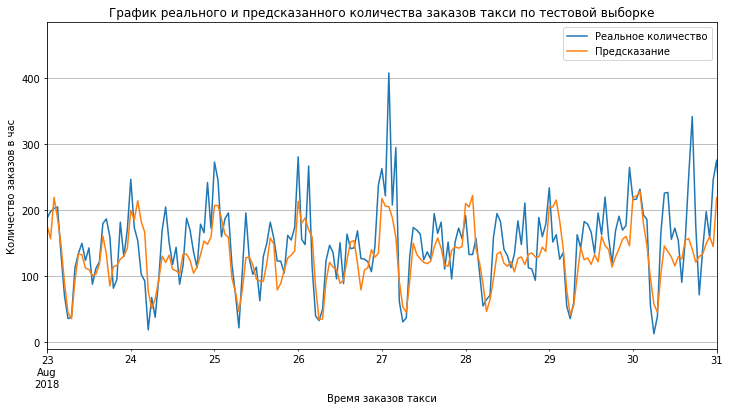

In [42]:
ax = plt.subplots
ax = work_sample['target_test'].plot(grid = True, y = 'target_test', figsize = (12, 6), label = 'Реальное количество')
pd.Series(data = predicted, index = work_sample['target_test'].index).plot(grid = True, ax = ax,
                                                                           label = 'Предсказание')
ax.legend()
plt.xlim(('2018-08-23', '2018-08-31'))
plt.xlabel('Время заказов такси')
plt.ylabel('Количество заказов в час')
plt.title('График реального и предсказанного количества заказов такси по тестовой выборке')
plt.show()

По графику видим, что модель не очень хорошо справляется с предсказанием выбросов - резкого увеличения реального количества заказов.

### Вывод

По полученным результатам на тестовой выборке выбрана наилучшая модель предсказания. Сделано сравнение с константной моделью.

## Выводы

В рамках данного исследования был проведен анализ данных о количестве заказов такси в аэропортах на предмет наличия трендов, сезонности в различных периодах. По итогам анализа была создана таблица признаков, а также добавлены дополнительные признаки, сформированные на на основе скользащего среднего и разностей временного ряда. 

По созданным выборкам были разработаны модели предсказания количества заказов такси на следующий час. При разработке моделей помимо гиперпараметров (глубина дерева, количество деревьев) варьировался размер окна для скользящего среднего и размер максимального сдвига для разностей временного ряда, по которым были сформированы дополнительные признаки. 

По результатам тестирования моделей наилучшей оказалась модель  LightGBMRegressor с ошибкой $𝑅𝑀𝑆𝐸$  =40,9, что значительно лучше требуемого значения <48. Полученное значение метрики означает, что в среднем наше предсказание количества заказов на следующмй час обладает погрешнсть в примерно 41 заказ. 